# Exploratory Data Analysis - Global Superstore

Sayan De- FT252082 - Group 9

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [4]:
!kaggle datasets download ronysoliman/global-superstore-dataset
#!kaggle datasets download pushkarshah/global-superstore

Dataset URL: https://www.kaggle.com/datasets/ronysoliman/global-superstore-dataset
License(s): Community Data License Agreement - Sharing - Version 1.0
  0% 0.00/3.19M [00:00<?, ?B/s]
100% 3.19M/3.19M [00:00<00:00, 57.0MB/s]


In [5]:
!unzip global-superstore-dataset.zip

Archive:  global-superstore-dataset.zip
  inflating: superstore.csv          


# Potential Questions you can answer?

1. Geographical Sales Analysis: Which cities, states, or regions have the highest sales, and what trends can be identified across different regions?

2. Customer Segment Analysis: How do different customer segments (Consumer, Corporate, Home Office) contribute to sales and profit?

3. Product Category Insights: What are the top-selling product categories and sub-categories? Are there any categories with high sales but low profit margins?

4. Order Priority and Shipping Analysis: Does the “Order Priority” affect delivery times, sales, or profit? What is the relationship between “Ship Mode” and customer satisfaction?

5. Time Series Analysis: What are the sales trends over time (e.g., monthly, quarterly, annually)? Are there any seasonal patterns?

6. Discount Impact: How do discounts affect sales and profit? Are there cases where higher discounts led to negative profit margins?

7. Customer Behavior Analysis: Who are the top customers in terms of revenue? What purchasing behavior can be observed from frequent buyers?

In [27]:
from logging import warning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

filepath = '/content/superstore.csv'
#orders_data = pd.read_excel(filepath, sheet_name='Orders')
#returns_data = pd.read_excel(filepath, sheet_name='Returns')
#people_data = pd.read_excel(filepath, sheet_name='People')

In [9]:
data = pd.read_csv(filepath)

In [10]:
data.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [11]:
data.shape

(51290, 27)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [13]:
data.isnull().sum()

,0
Category,0
City,0
Country,0
Customer.ID,0
Customer.Name,0
Discount,0
Market,0
记录数,0
Order.Date,0
Order.ID,0


In [14]:
data.duplicated().sum()

0

In [16]:
data.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


# Group 9 Region: Central Asia

In [18]:
data.Region.value_counts()

,count
Region,
Central,11117
South,6645
EMEA,5029
North,4785
Africa,4587
Oceania,3487
West,3203
Southeast Asia,3129
East,2848


## Potential Questions you can answer?
Geographical Sales Analysis: Which cities, states, or regions have the highest sales, and what trends can be identified across different regions?

Customer Segment Analysis: How do different customer segments (Consumer, Corporate, Home Office) contribute to sales and profit?

Product Category Insights: What are the top-selling product categories and sub-categories? Are there any categories with high sales but low profit margins?

Order Priority and Shipping Analysis: Does the “Order Priority” affect delivery times, sales, or profit? What is the relationship between “Ship Mode” and customer satisfaction?

Time Series Analysis: What are the sales trends over time (e.g., monthly, quarterly, annually)? Are there any seasonal patterns?

Discount Impact: How do discounts affect sales and profit? Are there cases where higher discounts led to negative profit margins?

Customer Behavior Analysis: Who are the top customers in terms of revenue? What purchasing behavior can be observed from frequent buyers?




In [19]:
#filtering the data for region central asia and creating a seperate dataframe
df_ca = data[data['Region']=='Central Asia']

In [20]:
df_ca.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
3318,Office Supplies,Hyderabad,India,NM-184451,Nathan Mautz,0.0,APAC,1,2011-01-26 00:00:00.000,IN-2011-31496,...,79,Home Office,2011-01-28 00:00:00.000,Second Class,13.82,Telangana,Paper,2011,APAC,5
3338,Office Supplies,Madurai,India,TA-213851,Tom Ashbrook,0.0,APAC,1,2011-06-28 00:00:00.000,IN-2011-46581,...,191,Home Office,2011-07-02 00:00:00.000,Second Class,25.00,Tamil Nadu,Envelopes,2011,APAC,27
3345,Office Supplies,Jabalpur,India,NF-184751,Neil Französisch,0.0,APAC,1,2011-07-29 00:00:00.000,IN-2011-73244,...,107,Home Office,2011-08-01 00:00:00.000,First Class,16.64,Madhya Pradesh,Supplies,2011,APAC,31
3347,Office Supplies,Hapur,India,VP-217301,Victor Preis,0.0,APAC,1,2011-08-20 00:00:00.000,IN-2011-22585,...,145,Home Office,2011-08-23 00:00:00.000,Second Class,11.09,Uttar Pradesh,Storage,2011,APAC,34
3348,Office Supplies,Guntur,India,CW-119051,Carl Weiss,0.0,APAC,1,2011-08-25 00:00:00.000,IN-2011-77479,...,34,Home Office,2011-08-27 00:00:00.000,Second Class,5.32,Andhra Pradesh,Labels,2011,APAC,35


In [22]:
#Q2 : Customer Segment Analysis: How do different customer segments (Consumer, Corporate, Home Office) contribute to sales and profit?

In [23]:
# Customer Segments
df_ca.Segment.value_counts()

,count
Segment,
Consumer,1042
Corporate,613
Home Office,393


In [33]:
df_ca_sum = df_ca.groupby('Segment')['Sales'].sum()
df_ca_avg = df_ca.groupby('Segment')['Sales'].mean()

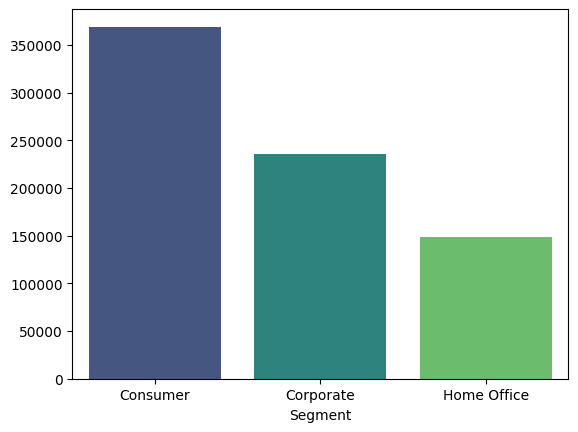

In [34]:
# Segment wise Total Sales
sns.barplot(x = df_ca_sum.index, y = df_ca_sum.values, palette = 'viridis')
plt.show()

In [36]:
#The Consumer Segemnt is the highest contributor to the 'Total sales' in Central Asia

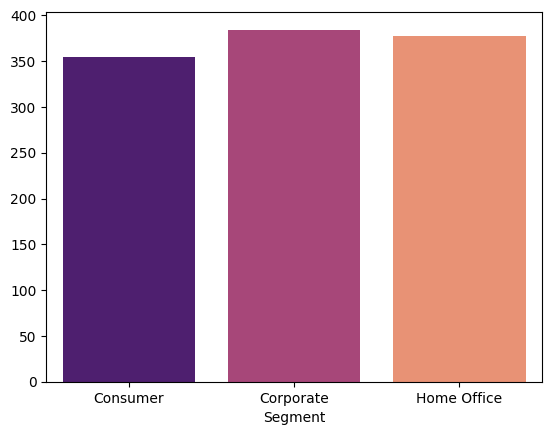

In [35]:
# Segment wise Average sum
sns.barplot(x = df_ca_avg.index, y = df_ca_avg.values, palette = 'magma')
plt.show()

In [37]:
# The corporate segment is the highest contributor to the 'Average sales' in Central Asia

In [38]:
df_prof_sum = df_ca.groupby('Segment')['Profit'].sum()
df_prof_avg = df_ca.groupby('Segment')['Profit'].mean()

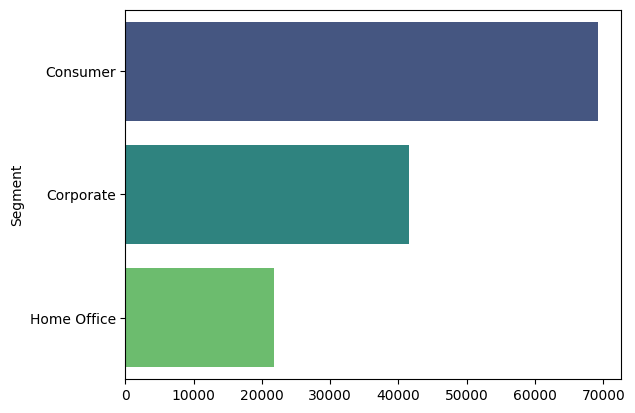

In [41]:
# Segment wise Total Profit
sns.barplot(y = df_prof_sum.index, x = df_prof_sum.values, palette = 'viridis')
plt.show()

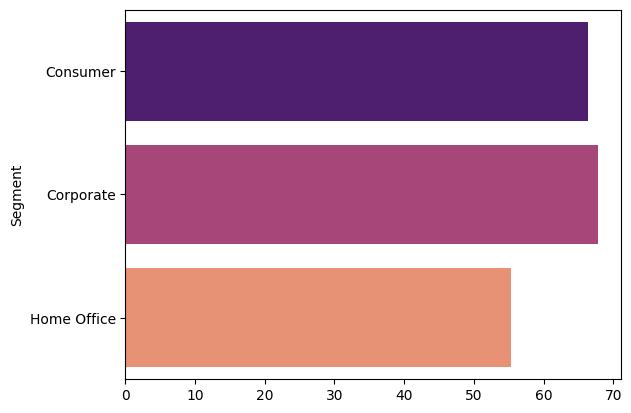

In [42]:
# Segment wise Total Profit
sns.barplot(y = df_prof_avg.index, x = df_prof_avg.values, palette = 'magma')
plt.show()

In [43]:
# In Central asia, Consumer segment is highest contributor for Total Profit whereas Corporate segment  is highest contributor for Avg Profit

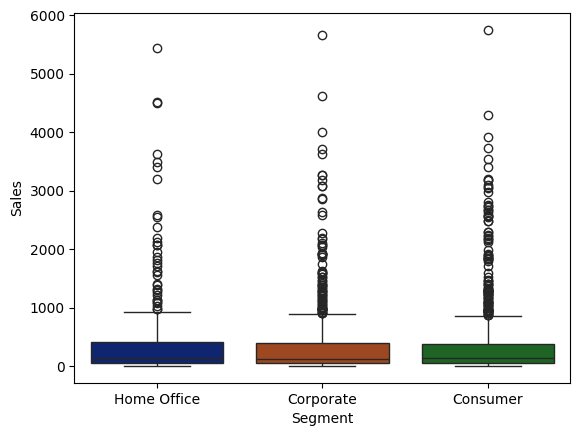

In [48]:
sns.boxplot(y = 'Sales',x = 'Segment', data = df_ca, palette = 'dark')
plt.show()

In [49]:
#for all the segment we can observe there are multiple outliers

In [50]:
# Q4 : Order Priority and Shipping Analysis: Does the “Order Priority” affect delivery times, sales, or profit? What is the relationship between “Ship Mode” and customer satisfaction?

In [51]:
df_ca.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [57]:
df_ca['Order.Priority'].value_counts()

,count
Order.Priority,
Medium,1212
High,601
Critical,162
Low,73


In [62]:
df_ca.groupby('Order.Priority')['Sales'].mean()

,Sales
Order.Priority,
Critical,323.222222
High,357.698835
Low,312.000000
Medium,381.785479


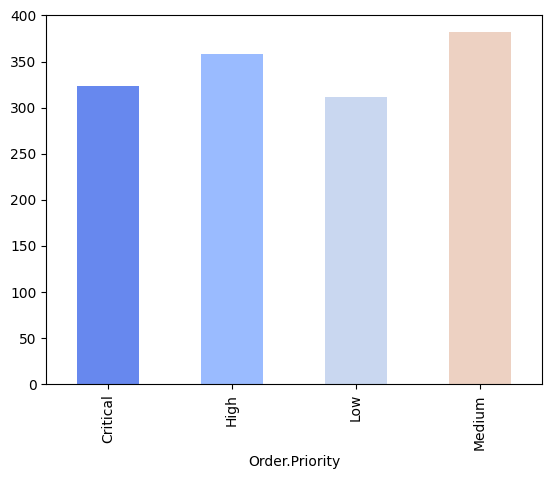

In [66]:
df_ca.groupby('Order.Priority')['Sales'].mean().plot(kind = 'bar', color = sns.color_palette('coolwarm'))
plt.show()

-  The Order Priority 'Medium' constitues for Highest Avg Sales

In [63]:
df_ca.groupby('Order.Priority')['Profit'].mean()

,Profit
Order.Priority,
Critical,73.952833
High,56.220246
Low,38.985329
Medium,69.195983


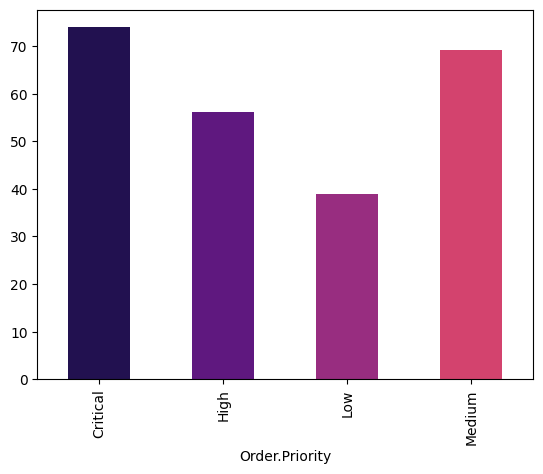

In [65]:
df_ca.groupby('Order.Priority')['Profit'].mean().plot(kind = 'bar', color = sns.color_palette('magma'))
plt.show()

- The Order Priority 'Critical' constitues for Highest Avg Profit

In [68]:
# Discount Analysis : Discount Impact: How do discounts affect sales and profit? Are there cases where higher discounts led to negative profit margins?

In [74]:
df_prof = df_ca[['Discount','Sales','Profit']]

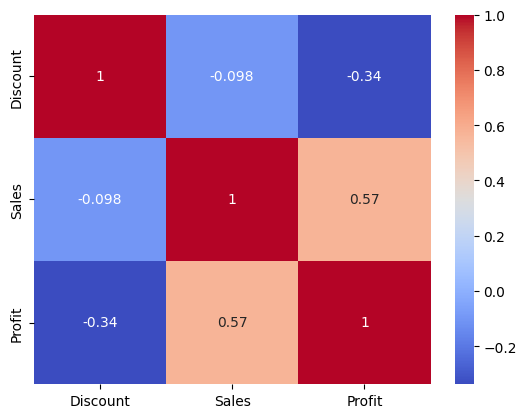

In [75]:
sns.heatmap(df_prof.corr(), annot = True, cmap = 'coolwarm')
plt.show()

There is Negative correlation between Discount vs Sales and Profit, with higheer neg corr with profit

It means , with increasing discount -> the Profit is decreasing

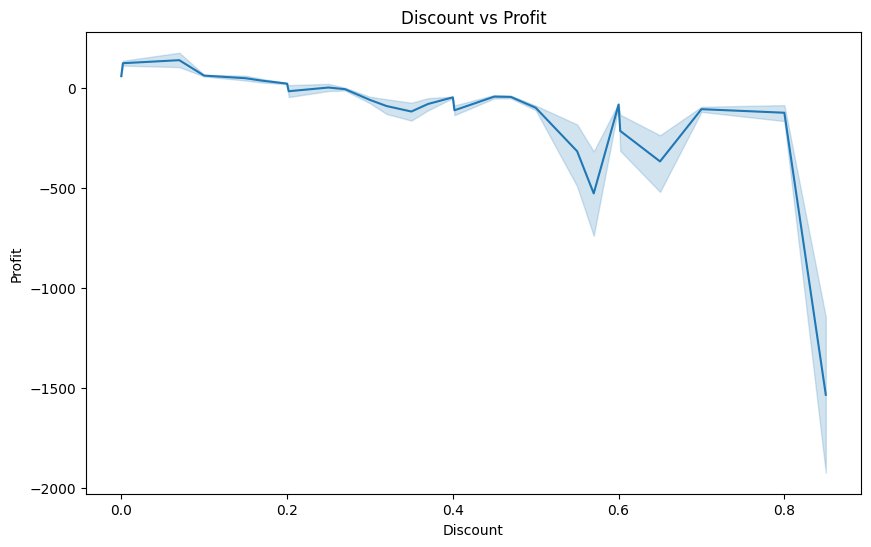

In [73]:
#discount vs profit

plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount', y='Profit', data=data)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

As from the Lineplot , we can see that with Increasing discount we can see increasing negative Profit Margin

In [76]:
#Q1

In [78]:
df = data

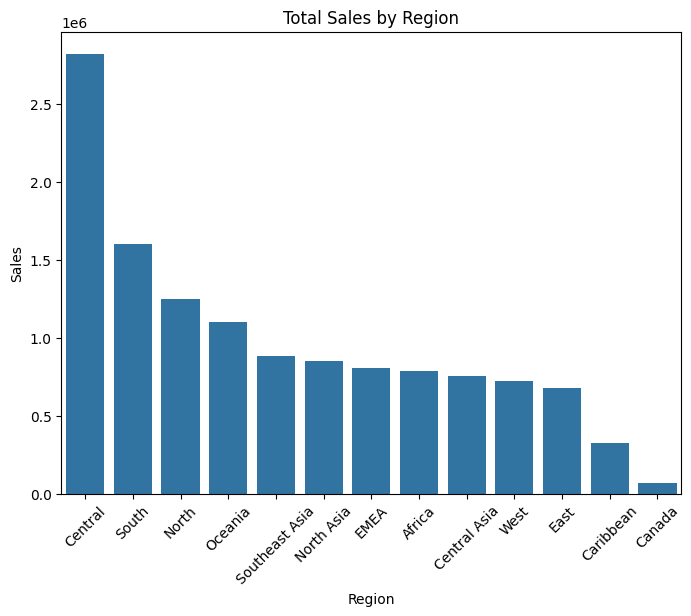

In [79]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

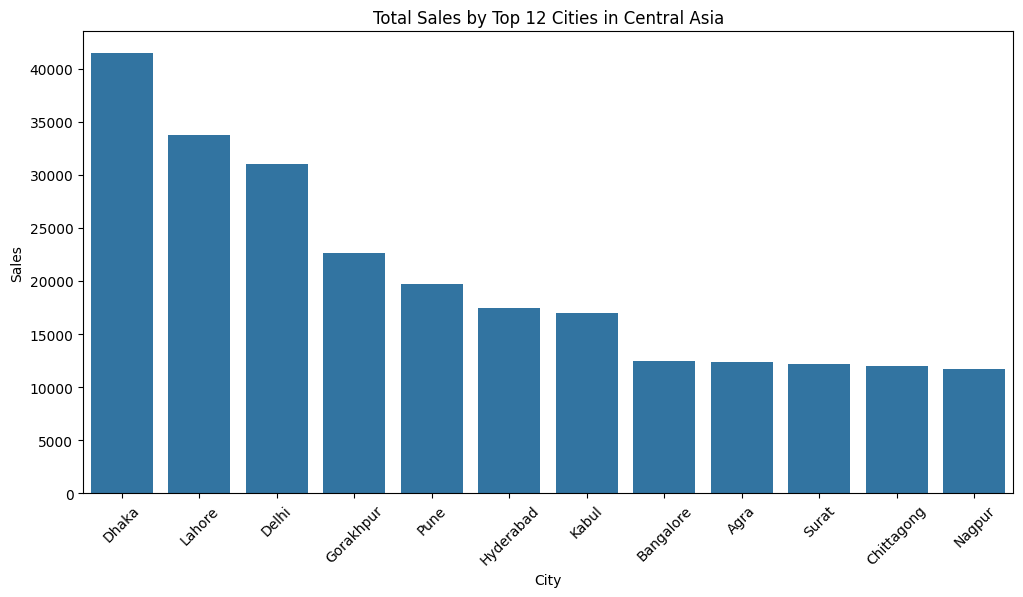

In [80]:
df_central_asia = df[df['Region'] == 'Central Asia']

top_12_cities = df_central_asia.groupby('City')['Sales'].sum().sort_values(ascending=False).head(12)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_12_cities.index, y=top_12_cities.values)
plt.title('Total Sales by Top 12 Cities in Central Asia')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

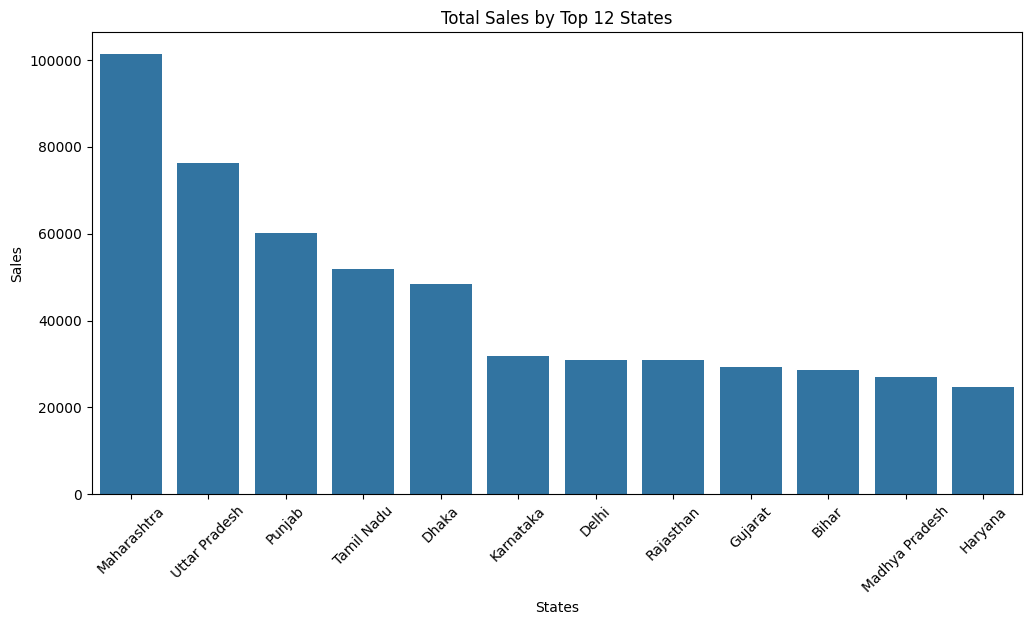

In [81]:
top_12_States = df_central_asia.groupby('State')['Sales'].sum().sort_values(ascending=False).head(12)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_12_States.index, y=top_12_States.values)
plt.title('Total Sales by Top 12 States')
plt.xlabel('States')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

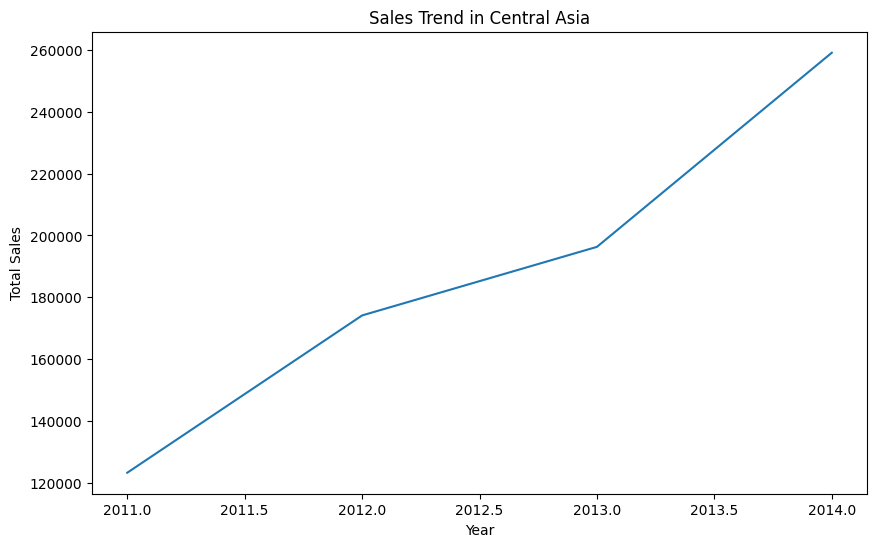

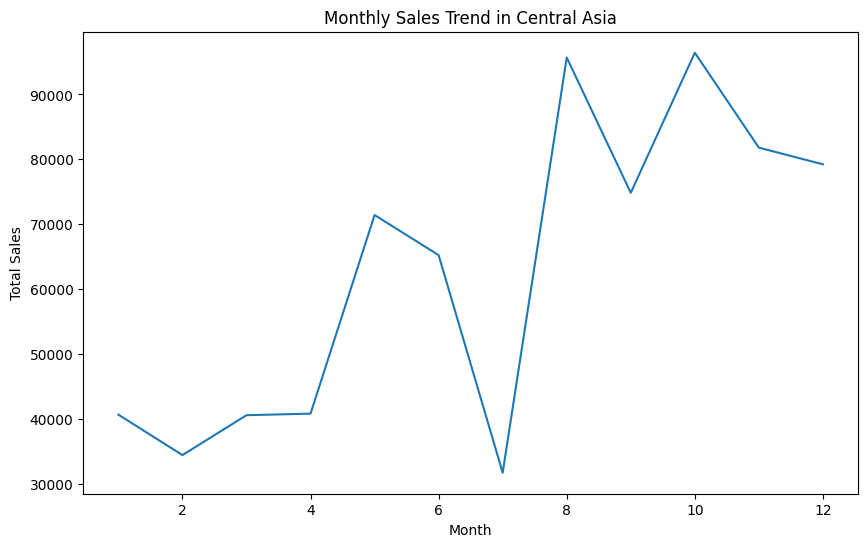

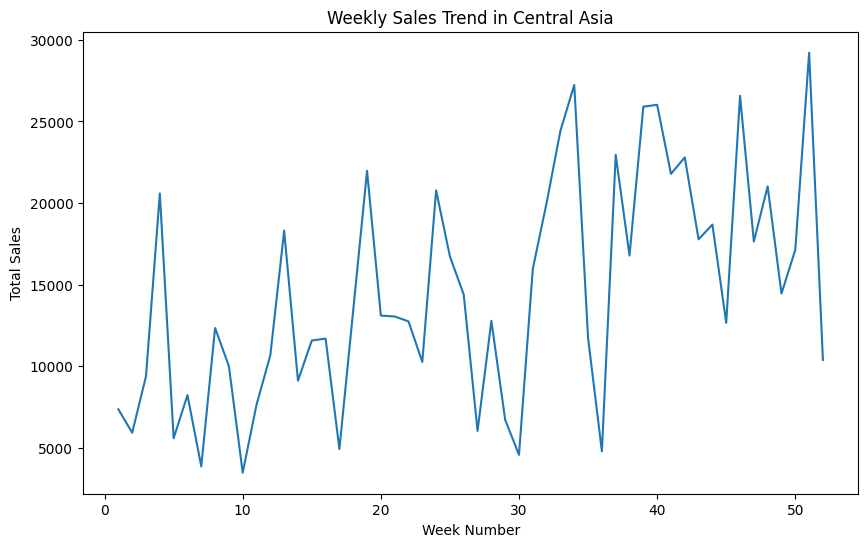

In [82]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Year'] = df['Order.Date'].dt.year
df['Month'] = df['Order.Date'].dt.month
df['weeknum'] = df['Order.Date'].dt.isocalendar().week

df_central_asia = df[df['Region'] == 'Central Asia']

yearly_sales_central_asia = df_central_asia.groupby('Year')['Sales'].sum()


plt.figure(figsize=(10, 6))
plt.plot(yearly_sales_central_asia.index, yearly_sales_central_asia.values)
plt.title('Sales Trend in Central Asia')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


monthly_sales_central_asia = df_central_asia.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_central_asia.index, monthly_sales_central_asia.values)
plt.title('Monthly Sales Trend in Central Asia')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


weekly_sales_central_asia = df_central_asia.groupby('weeknum')['Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(weekly_sales_central_asia.index, weekly_sales_central_asia.values)
plt.title('Weekly Sales Trend in Central Asia')
plt.xlabel('Week Number')
plt.ylabel('Total Sales')
plt.show()

1.Sales are increasing exponetially in the region Central Asia.

2.Sales are much higher in the end of the year August - December, due to festive season.

3.In some weeks the sales are much higher showing seasonality

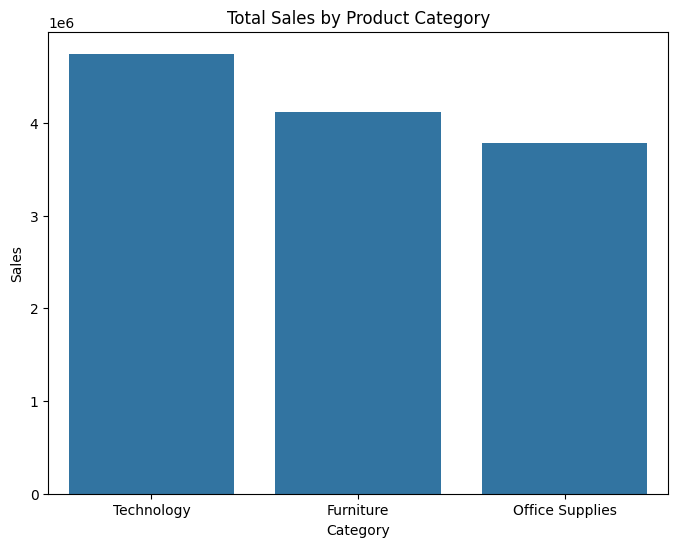

In [83]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [85]:
CA_data = df_ca

Q3

In [86]:
product_Category_count = CA_data.groupby('Category')['Category'].count()

# Display the results.
print(product_Category_count)

Category
Furniture           478
Office Supplies    1111
Technology          459
Name: Category, dtype: int64


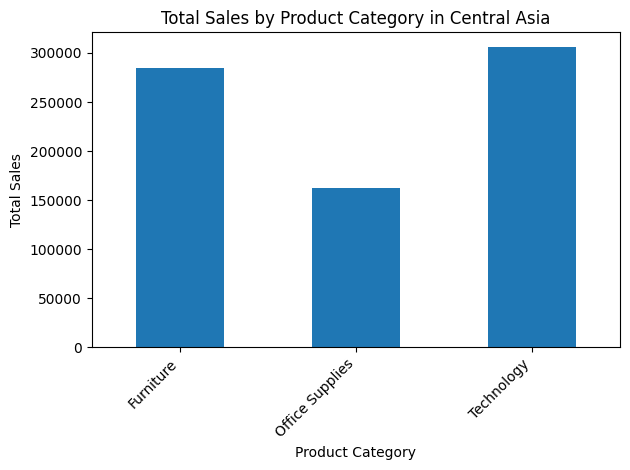

In [87]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Group by 'Category' and sum the 'Sales' for each category
product_Category_sales = CA_data.groupby('Category')['Sales'].sum()

# Create the bar chart using the summed sales
product_Category_sales.plot.bar(x='Category', y='Sales')
plt.xlabel("Product Category")
plt.ylabel("Total Sales")  # Update y-axis label
plt.title("Total Sales by Product Category in Central Asia")  # Update title
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Technology is the top selling product **category**

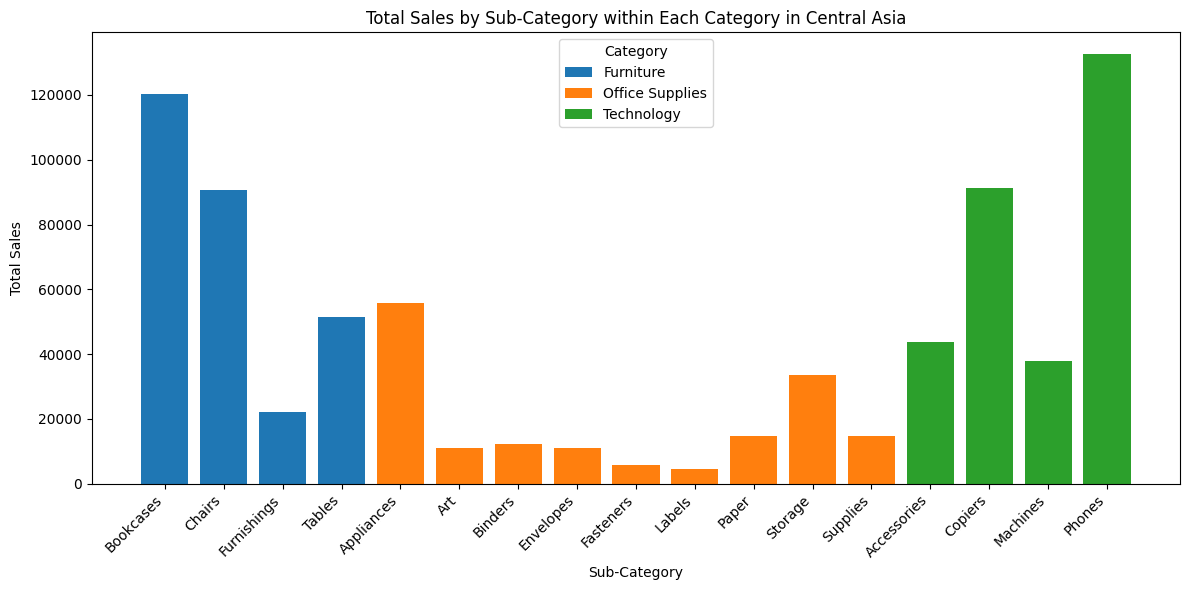

In [88]:

subcat_sales = CA_data.groupby(['Category', 'Sub.Category'])['Sales'].sum().reset_index(name='Total Sales')


fig, ax = plt.subplots(figsize=(12, 6)) # Adjust figsize for better visualization

for category, group in subcat_sales.groupby('Category'):
    ax.bar(group['Sub.Category'], group['Total Sales'], label=category)

ax.set_xlabel("Sub-Category")
ax.set_ylabel("Total Sales")  # Update y-axis label
ax.set_title("Total Sales by Sub-Category within Each Category in Central Asia")  # Update title
ax.legend(title="Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **phones and book cases are high selling sub categories. sub categories of office supplies are sold less**

In [89]:
subcategory_performance = CA_data.groupby('Sub.Category').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

print(subcategory_performance)

   Sub.Category  Total_Sales  Total_Profit
0   Accessories        43619      8026.185
1    Appliances        55618      6268.995
2           Art        10827      2172.330
3       Binders        12291      2767.125
4     Bookcases       120159     21943.692
5        Chairs        90673     17435.238
6       Copiers        91403     17811.705
7     Envelopes        10911      2182.095
8     Fasteners         5703      1025.100
9   Furnishings        22025      5366.928
10       Labels         4517       896.085
11     Machines        37965      7494.045
12        Paper        14715      3006.045
13       Phones       132715     23108.040
14      Storage        33636      6137.875
15     Supplies        14550      2648.850
16       Tables        51512      4189.854


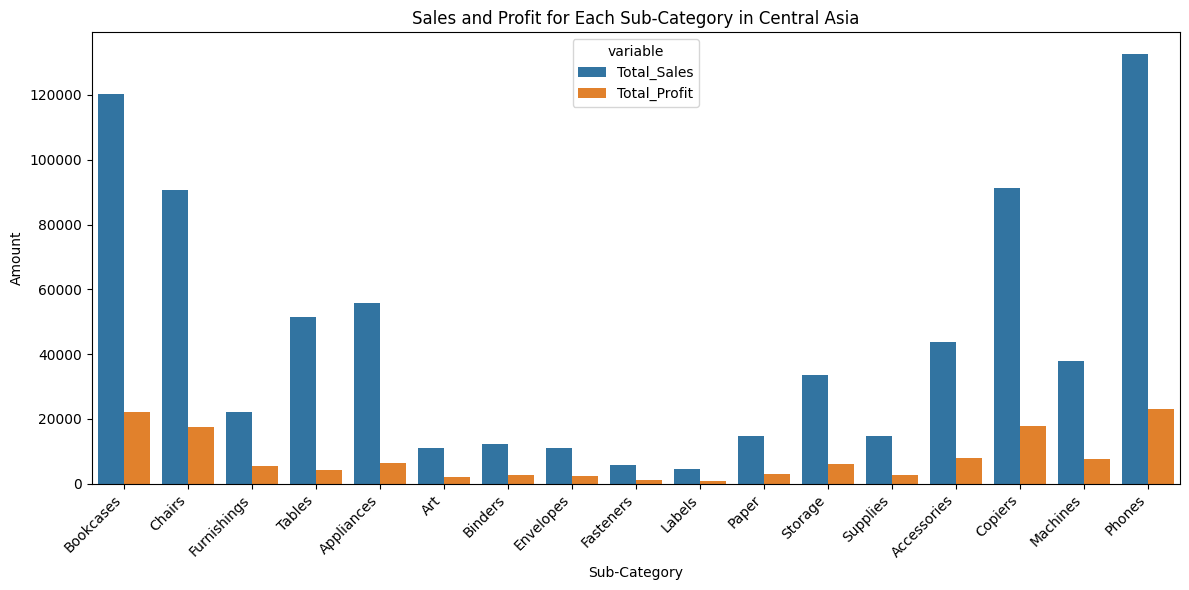

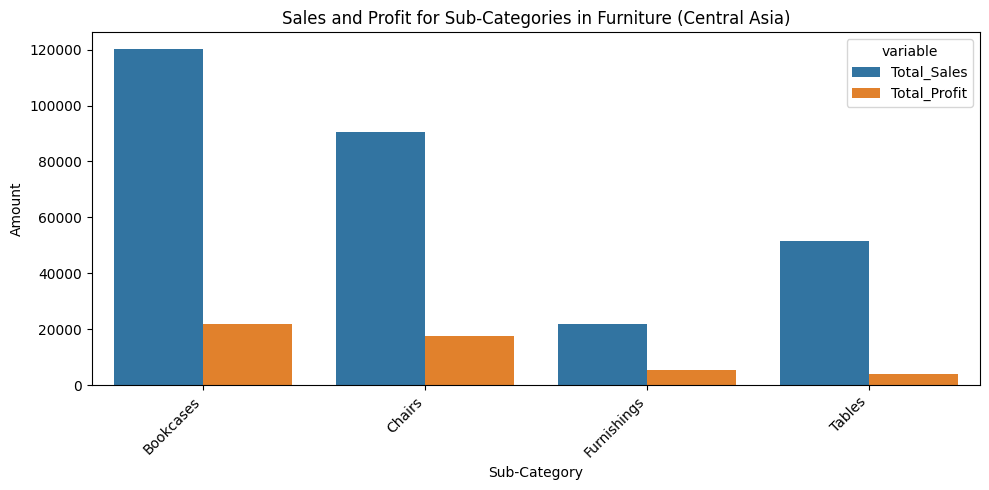

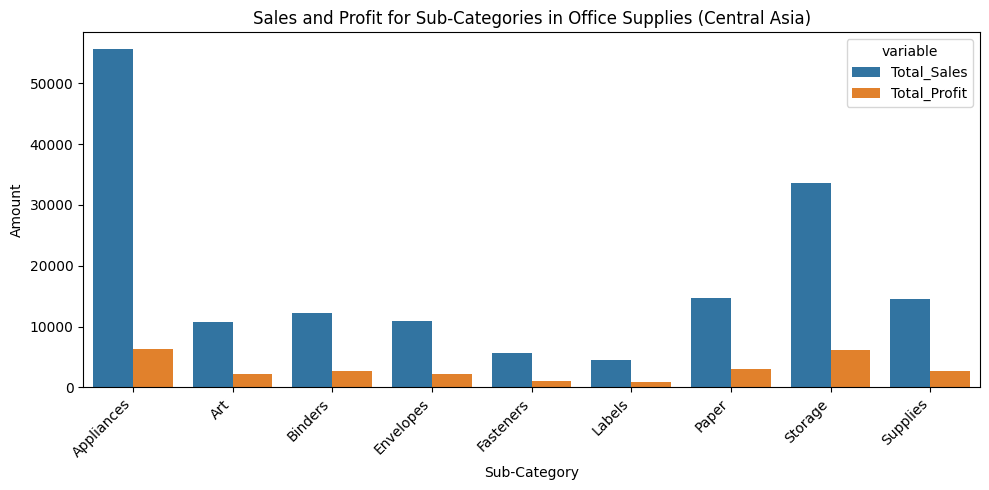

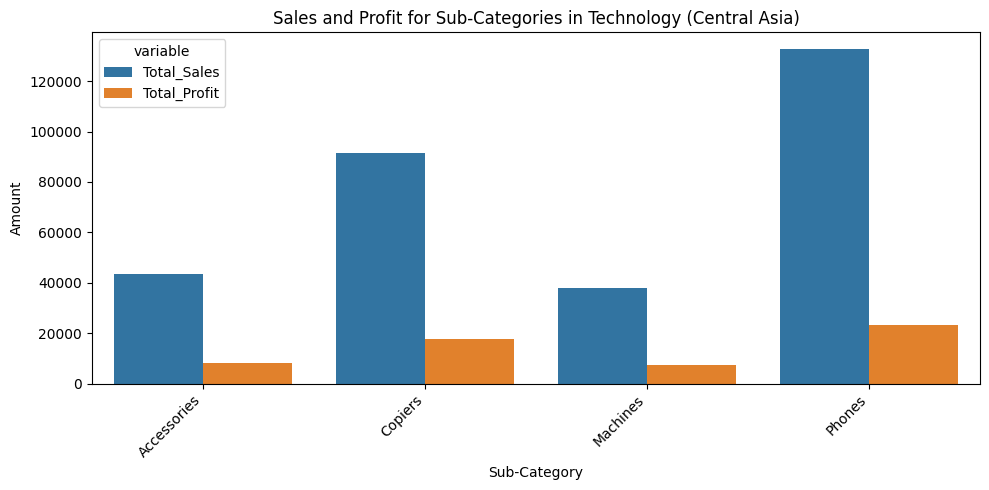

In [90]:


subcategory_performance = CA_data.groupby(['Category', 'Sub.Category']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='Sub.Category', y='value', hue='variable',
            data=subcategory_performance.melt(id_vars=['Category', 'Sub.Category'],
                                              value_vars=['Total_Sales', 'Total_Profit']))
plt.title('Sales and Profit for Each Sub-Category in Central Asia')
plt.xlabel('Sub-Category')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


for category, group in subcategory_performance.groupby('Category'):
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Sub.Category', y='value', hue='variable',
                data=group.melt(id_vars=['Sub.Category'],
                                  value_vars=['Total_Sales', 'Total_Profit']))
    plt.title(f'Sales and Profit for Sub-Categories in {category} (Central Asia)')
    plt.xlabel('Sub-Category')
    plt.ylabel('Amount')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **Book cases and appliances have very high sales but less profits**

assumption is the profit is for the whole order and not one quantity. because relevant information is not given in the kaggle

In [91]:
#Q6

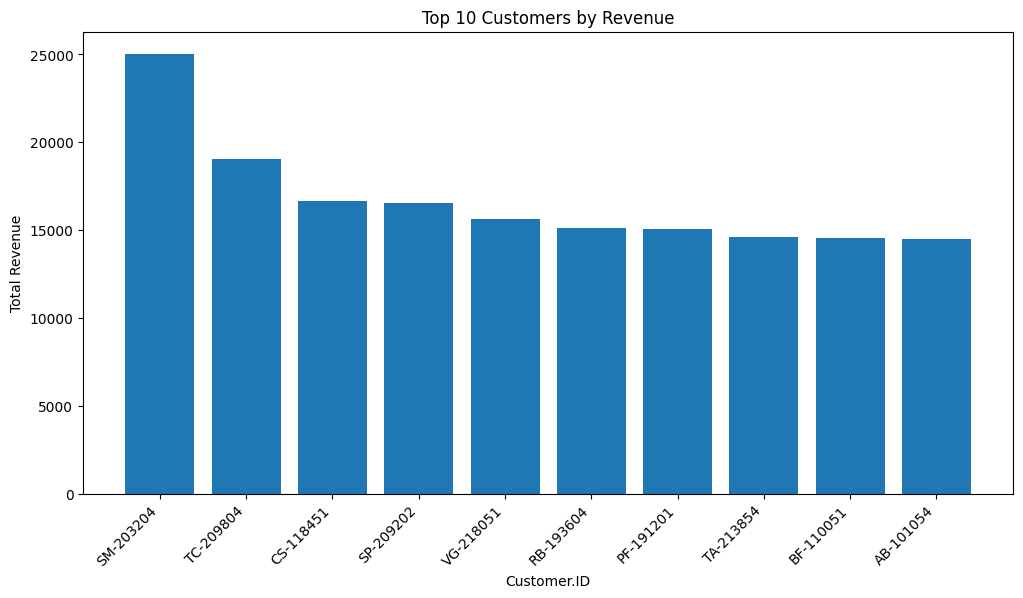

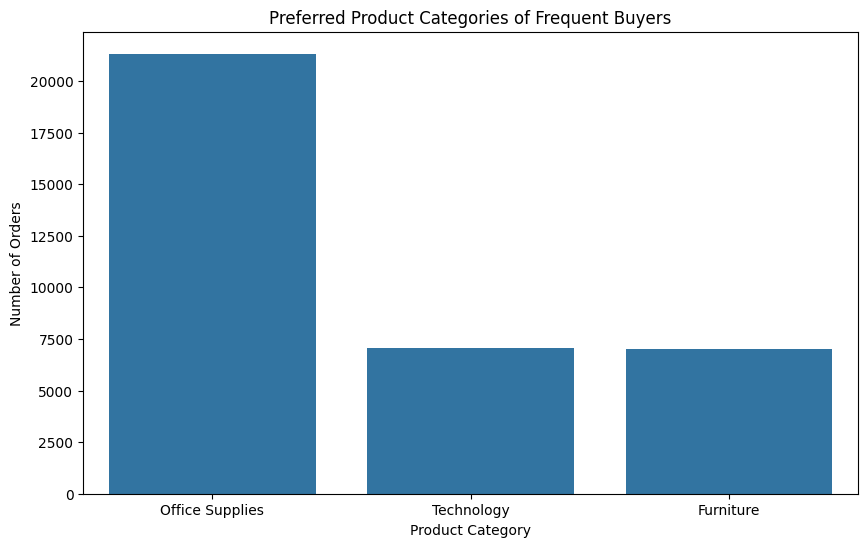

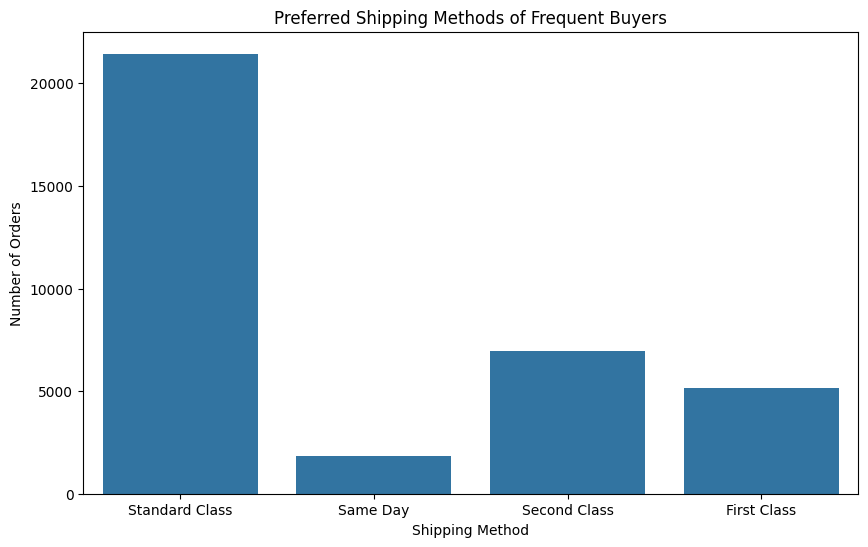

In [92]:

top_customers = data.groupby('Customer.ID')['Sales'].sum().sort_values(ascending=False)

# Plot the top 10 customers
plt.figure(figsize=(12, 6))
plt.bar(top_customers.head(10).index, top_customers.head(10).values)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer.ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

# Analyze purchasing behavior of frequent buyers
frequent_buyers = data.groupby('Customer.ID')['Order.ID'].count().sort_values(ascending=False)

# Find customers with more than a certain number of orders (e.g., 10)
frequent_buyer_ids = frequent_buyers[frequent_buyers > 10].index.tolist()

# Filter data for frequent buyers
frequent_buyer_data = data[data['Customer.ID'].isin(frequent_buyer_ids)]

# Analyze their purchasing patterns (e.g., preferred product categories, shipping methods, order frequency)
# Example: Product category preference
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=frequent_buyer_data)
plt.title('Preferred Product Categories of Frequent Buyers')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.show()

# Example: Shipping method preference
plt.figure(figsize=(10, 6))
sns.countplot(x='Ship.Mode', data=frequent_buyer_data)
plt.title('Preferred Shipping Methods of Frequent Buyers')
plt.xlabel('Shipping Method')
plt.ylabel('Number of Orders')
plt.show()


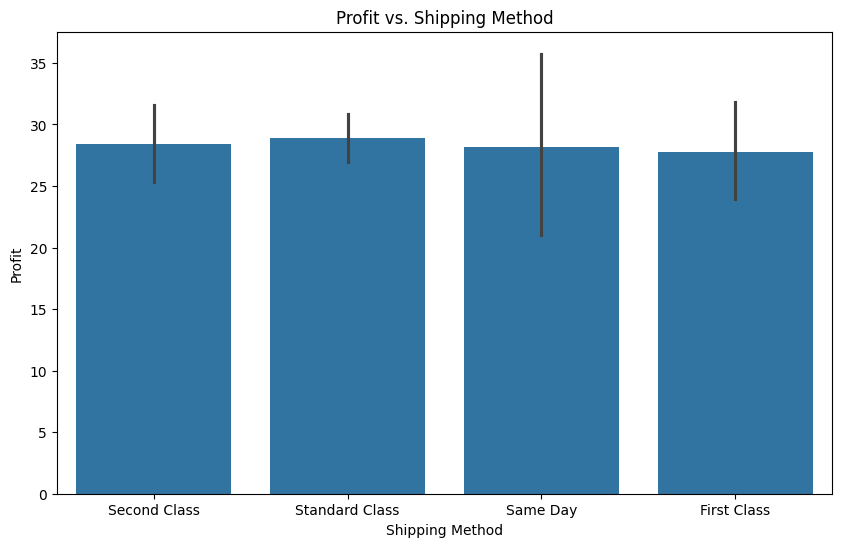

In [93]:
# Profit vs Shipping mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship.Mode', y='Profit', data=data)
plt.title('Profit vs. Shipping Method')
plt.xlabel('Shipping Method')
plt.ylabel('Profit')
plt.show()
